# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-10.1.-Modeling-a-wave" data-toc-modified-id="Exercise-10.1.-Modeling-a-wave-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 10.1. Modeling a wave</a></div><div class="lev1 toc-item"><a href="#Exercise-10.2.-Modeling-population-growth" data-toc-modified-id="Exercise-10.2.-Modeling-population-growth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 10.2. Modeling population growth</a></div><div class="lev1 toc-item"><a href="#Exercise-10.3.-Galileo’s-experiment" data-toc-modified-id="Exercise-10.3.-Galileo’s-experiment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 10.3. Galileo’s experiment</a></div><div class="lev1 toc-item"><a href="#Exercise-10.4.-Moore's-law" data-toc-modified-id="Exercise-10.4.-Moore's-law-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 10.4. Moore's law</a></div><div class="lev1 toc-item"><a href="#Exercise-10.5.-Ohm's-law" data-toc-modified-id="Exercise-10.5.-Ohm's-law-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 10.5. Ohm's law</a></div><div class="lev1 toc-item"><a href="#Exercise-10.6.-Modeling-multiple-waves" data-toc-modified-id="Exercise-10.6.-Modeling-multiple-waves-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 10.6. Modeling multiple waves</a></div><div class="lev1 toc-item"><a href="#Exercise-10.7.-An-elliptical-decision-boundary" data-toc-modified-id="Exercise-10.7.-An-elliptical-decision-boundary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 10.7. An elliptical decision boundary</a></div><div class="lev1 toc-item"><a href="#Exercise-10.8.-Engineering-features-for-a-two-class-classification-dataset" data-toc-modified-id="Exercise-10.8.-Engineering-features-for-a-two-class-classification-dataset-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 10.8. Engineering features for a two-class classification dataset</a></div><div class="lev1 toc-item"><a href="#Exercise-10.9.-A-circular-manifold" data-toc-modified-id="Exercise-10.9.-A-circular-manifold-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 10.9. A circular manifold</a></div><div class="lev1 toc-item"><a href="#Extra:-Elliptical-boundaries" data-toc-modified-id="Extra:-Elliptical-boundaries-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Extra: Elliptical boundaries</a></div><div class="lev1 toc-item"><a href="#Extra:-Determining-the-orbit-of-celestial-bodies" data-toc-modified-id="Extra:-Determining-the-orbit-of-celestial-bodies-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Extra: Determining the orbit of celestial bodies</a></div>

In [3]:
datapath = '../mlrefined_datasets/nonlinear_superlearn_datasets/'

import autograd.numpy as np
import pandas as pd

# Exercise 10.1. Modeling a wave

In [2]:
# load data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')

# load input/output data
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))

(1, 21)
(1, 21)


In [3]:
x_with_ones = np.column_stack((np.ones(len(x.T)), x.T))
x_with_ones

array([[1.      , 0.68608 ],
       [1.      , 0.50679 ],
       [1.      , 0.34545 ],
       [1.      , 0.7581  ],
       [1.      , 0.1903  ],
       [1.      , 0.81336 ],
       [1.      , 0.95399 ],
       [1.      , 0.17358 ],
       [1.      , 0.14515 ],
       [1.      , 0.35531 ],
       [1.      , 0.59709 ],
       [1.      , 0.41464 ],
       [1.      , 0.53799 ],
       [1.      , 0.49533 ],
       [1.      , 0.4278  ],
       [1.      , 0.215   ],
       [1.      , 0.3791  ],
       [1.      , 0.85292 ],
       [1.      , 0.023528],
       [1.      , 0.52766 ],
       [1.      , 0.52465 ]])

In [4]:
import numpy as np
import pandas as pd
from jax import grad, hessian, vmap
import jax.numpy as jnp
import matplotlib.pyplot as plt



df_data = np.hstack((x.T, y.T))

columns = [f"feature {i}" for i in range(x.shape[0])] + ["values"]
df = pd.DataFrame(data=df_data, columns=columns)
df

,feature 0,values
0,0.686080,-0.991470
1,0.506790,-0.416320
2,0.345450,0.977640
3,0.758100,-0.613540
4,0.190300,1.278800
5,0.813360,-1.174500
6,0.953990,-0.341930
7,0.173580,0.602780
8,0.145150,0.750340
9,0.355310,1.026600


In [7]:
import jax.numpy as jnp
from jax import grad

class NonlinearRegression:
    def __init__(self, X, y):
        self.X = X.T
        self.y = y
        self.W = np.random.uniform(-5, 5, 2)
        self.V = np.random.uniform(-5, 5, 2)

    def MSE(self, y, w, v, x):
        return jnp.mean(((w[0] + w[1]*(jnp.sin(v[1]*jnp.stack(x) + v[0]))) - y)**2)

    def Adam(self, beta1, beta2, epsilon=1e-8, learning_rate=0.01, max_iters=500):
        mse_grad_W = grad(self.MSE, argnums=1)  # Градиент по W
        mse_grad_V = grad(self.MSE, argnums=2)  # Градиент по V

        m_W, v_W = 0, 0
        m_V, v_V = 0, 0

        for _ in range(max_iters):
            grad_W = mse_grad_W(self.y, self.W, self.V, self.X)
            grad_V = mse_grad_V(self.y, self.W, self.V, self.X)

            m_W = beta1 * m_W + (1 - beta1) * grad_W
            v_W = beta2 * v_W + (1 - beta2) * grad_W**2
            m_V = beta1 * m_V + (1 - beta1) * grad_V
            v_V = beta2 * v_V + (1 - beta2) * grad_V**2

            m_W_corr = m_W / (1 - beta1)
            v_W_corr = v_W / (1 - beta2)
            m_V_corr = m_V / (1 - beta1)
            v_V_corr = v_V / (1 - beta2)

            self.W -= learning_rate * m_W_corr / (jnp.sqrt(v_W_corr) + epsilon)
            self.V -= learning_rate * m_V_corr / (jnp.sqrt(v_V_corr) + epsilon)
            

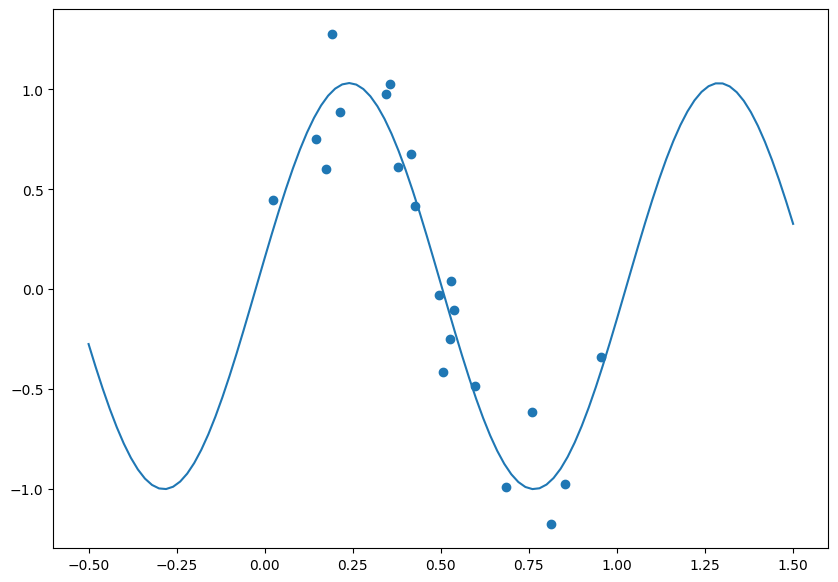

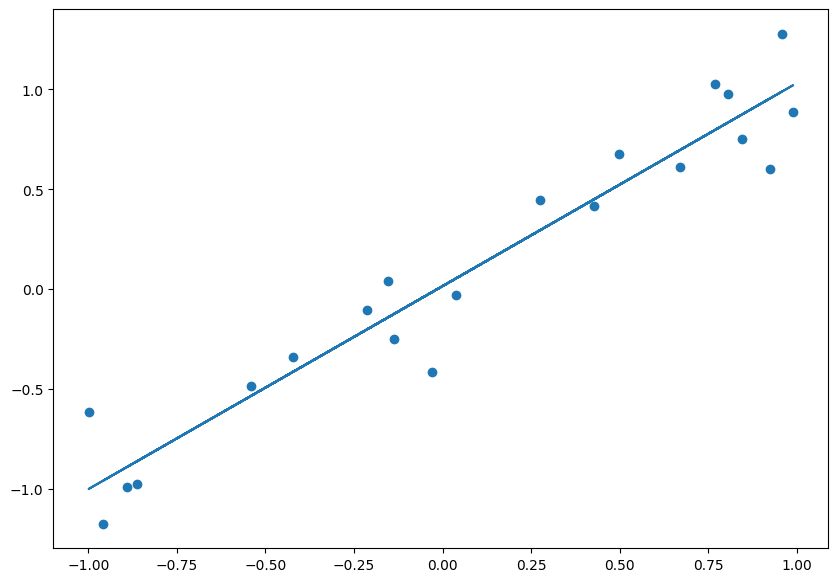

MSE:  0.03934635855824166


In [7]:
from sklearn.metrics import mean_squared_error

def sin_model(v, x):
    return jnp.sin(v[1]*jnp.stack(x) + v[0])

def linear_comb(w, f):
    return w[0] + w[1]*f


x = x.ravel()
model = NonlinearRegression(x, y.ravel())
model.Adam(0.9, 0.9, max_iters=1000)
w = model.W
v = model.V

rng = jnp.linspace(-0.5, 1.5, 101)
y_sin = sin_model(v, rng)
y_lin = linear_comb(w, y_sin)
plt.figure(figsize=(10, 7))
plt.plot(rng, y_lin)
plt.scatter(x, y.ravel())


plt.figure(figsize=(10, 7))
sx = sin_model(v, x)
lx = linear_comb(w, sx)
plt.scatter(sx, y.ravel())
plt.plot(sx, lx)
plt.show()
print("MSE: ", mean_squared_error(lx.ravel(), y.ravel()))

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from jax import grad, hessian, vmap
import jax.numpy as jnp
import matplotlib.pyplot as plt

gradient_boost_model = XGBRegressor(n_estimators=10)

gradient_boost_model.fit(x.reshape(-1, 1), y.ravel())
y_pred = gradient_boost_model.predict(x.reshape(-1, 1))
print("MSE: ", mean_squared_error(y_pred, y.ravel()))

MSE:  0.00838960669442936


# Exercise 10.2. Modeling population growth

In [9]:
a = jnp.array([1.0, 2.0, 3.0])
a + 1.0

Array([2., 3., 4.], dtype=float32)

In [10]:
# load data
csvname = datapath + 'yeast.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 
y -= np.min(y)
y /= np.max(y)

print(np.shape(x))
print(np.shape(y))

df_data = np.hstack((x.T, y.T))

columns = [f"feature {i}" for i in range(x.shape[0])] + ["values"]
df = pd.DataFrame(data=df_data, columns=columns)
df

(1, 19)
(1, 19)


,feature 0,values
0,0.0,0.000000
1,1.0,0.013339
2,2.0,0.029745
3,3.0,0.057651
4,4.0,0.094296
5,5.0,0.167893
6,6.0,0.252990
7,7.0,0.379791
8,8.0,0.522999
9,9.0,0.661454


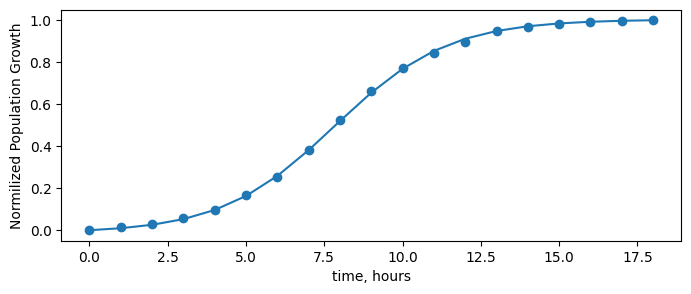

In [12]:
from sklearn.preprocessing import StandardScaler


class PopulationGrowth(NonlinearRegression):
     def MSE(self, y, w, v, x):
        return jnp.mean((w[0] + w[1]*(jnp.tanh(v[1]*jnp.stack(x) + v[0])) - y)**2)


def sigmoid_model(x, w, v):
    return w[0] + w[1]*jnp.tanh(v[1]*jnp.stack(x) + v[0])





std = StandardScaler()
data = std.fit_transform(x.reshape(-1, 1))


model = PopulationGrowth(data.ravel(), y.ravel())
model.Adam(0.8, 0.8, max_iters=5000)
w, v = model.W, model.V
y_pred = sigmoid_model(data, w, v)
plt.figure(figsize=(8, 3))
plt.scatter(x.ravel(), y.ravel())
plt.plot(x.ravel(), y_pred)
plt.xlabel("time, hours")
plt.ylabel("Normilized Population Growth")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error


print("Predicted: ", y_pred.T)
print("Real: ", y)
print("Weights:")
print(f"w {w}")
print(f"v {v}")
print("MSE: ", mean_squared_error(y.ravel(), y_pred.ravel()))

Predicted:  [[-3.4892559e-04  9.2427731e-03  2.5485009e-02  5.2488089e-02
   9.6037656e-02  1.6294357e-01  2.5843215e-01  3.8130778e-01
   5.1995891e-01  6.5501481e-01  7.6898175e-01  8.5407233e-01
   9.1197366e-01  9.4892865e-01  9.7155929e-01  9.8506856e-01
   9.9301028e-01  9.9763715e-01  1.0003184e+00]]
Real:  [[0.         0.01333947 0.02974548 0.05765103 0.09429623 0.16789328
  0.25298988 0.37979148 0.52299908 0.66145354 0.77230911 0.84345293
  0.89727078 0.95032199 0.96780129 0.98359399 0.9909537  0.9966268
  1.        ]]
Weights:
w [0.49516538 0.5088086 ]
v [0.3251589 1.5138594]
MSE:  2.8182601152349395e-05


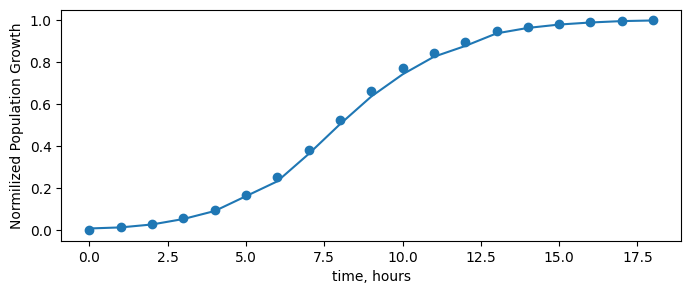

MSE:  0.00018834200814033992


In [14]:
from sklearn.ensemble import RandomForestRegressor



model = RandomForestRegressor()
model.fit(x.reshape(-1, 1), y.ravel())
y_pred = model.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 3))
plt.scatter(x.ravel(), y.ravel())
plt.plot(x.ravel(), y_pred)
plt.xlabel("time, hours")
plt.ylabel("Normilized Population Growth")
plt.show()
print("MSE: ", mean_squared_error(y.ravel(), y_pred.ravel()))

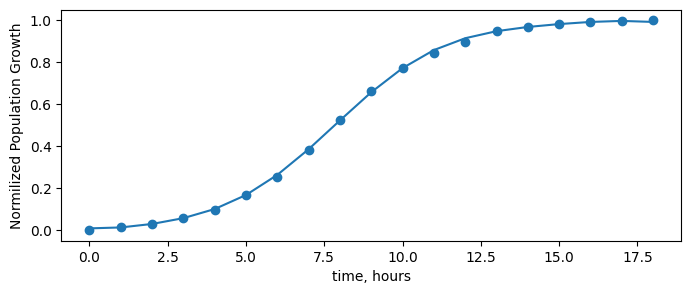

MSE:  4.5468216283889445e-05


In [15]:
from sklearn.svm import SVR


svr_machine = SVR(kernel='rbf', tol=1e-5, epsilon=0.0001)
svr_machine.fit(x.reshape(-1, 1), y.ravel())
y_pred = svr_machine.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 3))
plt.scatter(x.ravel(), y.ravel())
plt.plot(x.ravel(), y_pred)
plt.xlabel("time, hours")
plt.ylabel("Normilized Population Growth")
plt.show()
print("MSE: ", mean_squared_error(y.ravel(), y_pred.ravel()))

# Exercise 10.3. Galileo’s experiment

In [16]:
# load data
csvname = datapath + 'galileo_ramp_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))


df_data = np.hstack((x.T, y.T))

columns = [f"feature {i}" for i in range(x.shape[0])] + ["values"]
df = pd.DataFrame(data=df_data, columns=columns)
df

(1, 6)
(1, 6)


,feature 0,values
0,0.000000,0.000000
1,3.663333,0.250000
2,5.023333,0.500000
3,5.873333,0.666667
4,6.203333,0.750000
5,7.145000,1.000000


In [17]:
class GalileoExp(NonlinearRegression):
    def __init__(self, X, y):
        self.X = X.T
        self.y = y
        self.W = np.random.uniform(-5, 5, 3)
        self.V = np.random.uniform(-5, 5, 3)
 
    def MSE(self, y, w, v, x):
        return jnp.mean(((w[0] + w[1]*jnp.stack(x) + w[2]*(jnp.stack(x))**2) - y)**2)



model = GalileoExp(x.ravel(), y.ravel())
model.Adam(0.9, 0.9, max_iters=1000)
w = model.W
sx = jnp.linspace(-1, 10, 100)
linear = w[1]*sx
quad = w[2]*sx**2
pred = linear + quad + w[0]

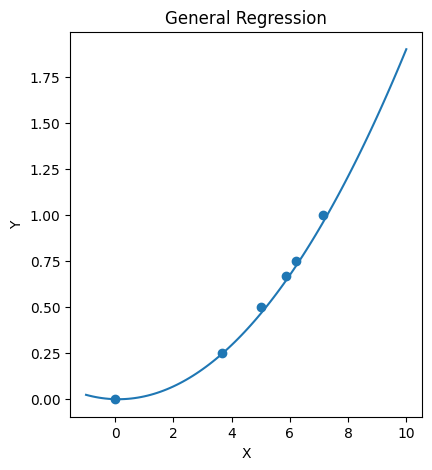

In [18]:
fig = plt.figure(figsize=(10, 5))

# Первый график

ax1 = fig.add_subplot(121)
ax1.scatter(x.ravel(), y.ravel())
ax1.plot(sx, pred)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title('General Regression')



plt.show()

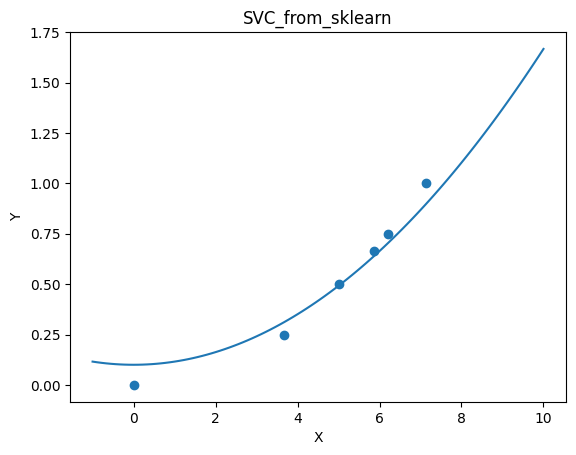

In [19]:
from sklearn.svm import SVR



svr_model = SVR(kernel="poly", degree=2, tol=1e-6)
svr_model.fit(x.reshape(-1, 1), y.ravel())
y_pred = svr_model.predict(x.reshape(-1, 1))
y_sx = svr_model.predict(sx.reshape(-1, 1))
plt.scatter(x.ravel(), y.ravel())
plt.plot(sx, y_sx)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SVC_from_sklearn")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error


linear = w[1]*x.ravel()
quad = w[2]*x.ravel()**2
pred = linear + quad + w[0]


print("MSE: ", mean_squared_error(y.ravel(), pred))
print("MSE: ", mean_squared_error(y.ravel(), y_pred))

MSE:  0.0006905392153759302
MSE:  0.004424061129702022


# Exercise 10.4. Moore's law

In [21]:
# import the dataset
csvname = datapath + 'transistor_counts.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

print(np.shape(x))
print(np.shape(y))

data = np.concatenate((x, y), axis=1)

# Создание списка названий столбцов
columns = [f"feature {i}" for i in range(x.shape[1])] + [f"value {x.shape[1]+i}" for i in range(y.shape[1])]

# Создание DataFrame
df = pd.DataFrame(data=data, columns=columns)

# Вывод DataFrame
df["log_value 1"] = df["value 1"].apply(lambda x: jnp.log(x))

(85, 1)
(85, 1)


In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV



params = {"alpha": [0.0, 1.0, 10.0, 100.0, 0.01, 0.1, 0.001, 0.00001], "positive": [True, False]}
model = GridSearchCV(Ridge(), params, cv=3)

model.fit(df[['feature 0']], df['log_value 1'])
best = model.best_estimator_

In [23]:

mass = jnp.linspace(1970, 2022, 100)
y_pred = best.predict(df[['feature 0']])
print("MSE: ", mean_squared_error(y_pred, df['log_value 1']))

MSE:  0.8808952562170844


C:\Users\Alex\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


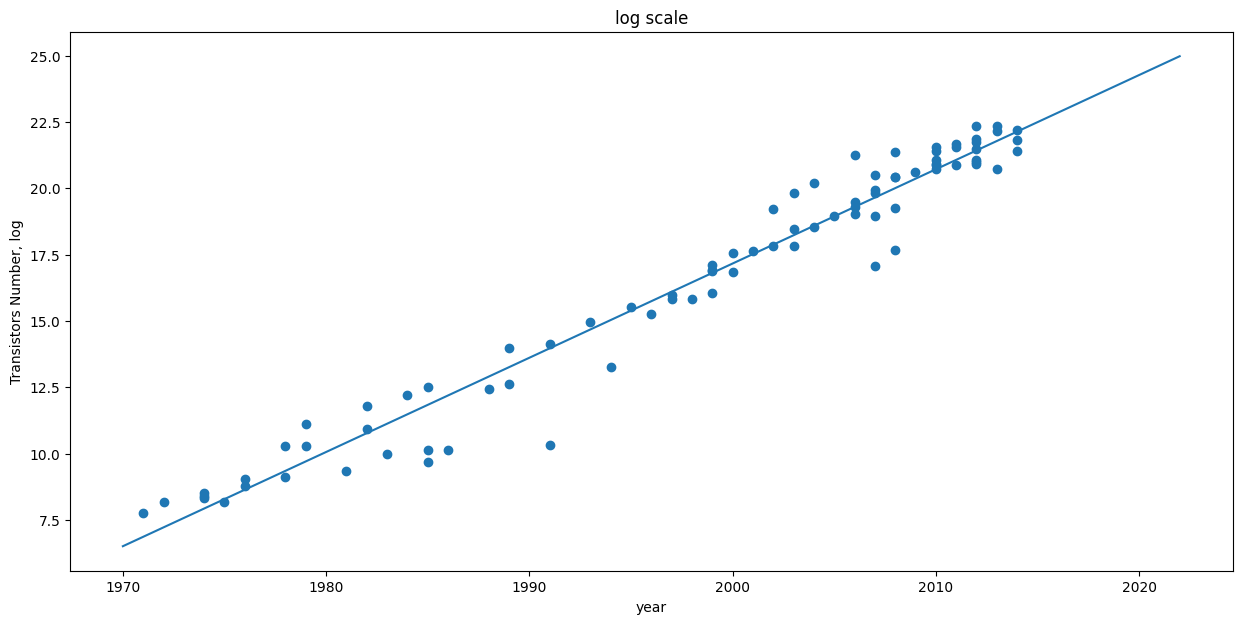

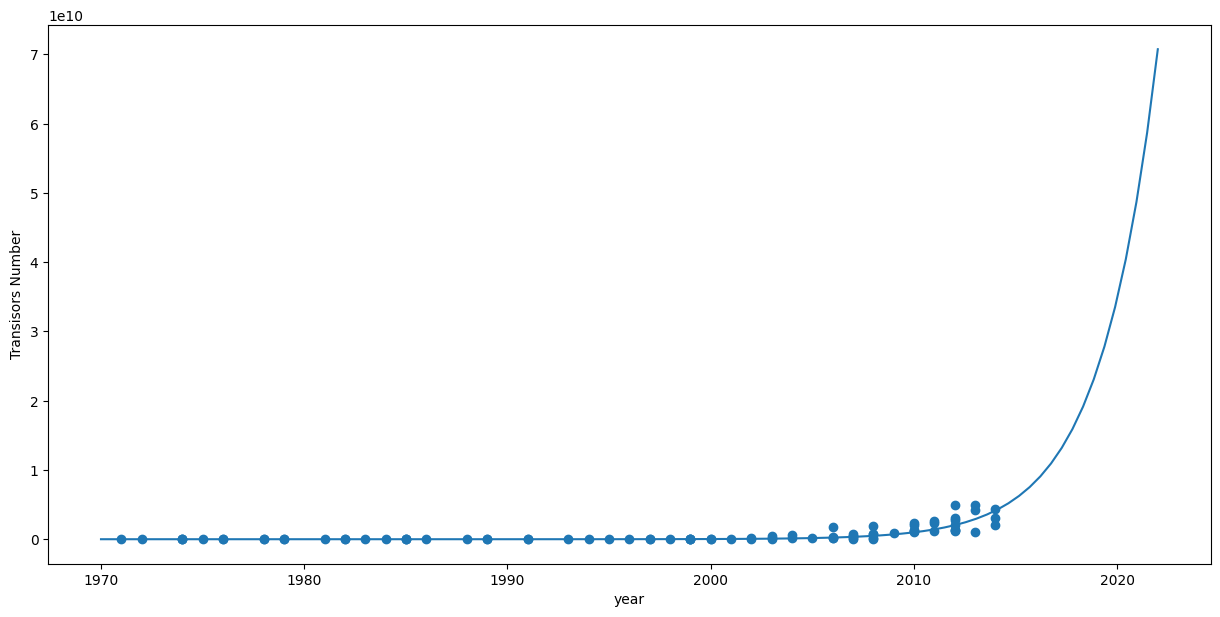

In [24]:
mass_y = best.predict(mass.reshape(-1, 1))
exp_y = jnp.exp(mass_y)

plt.figure(figsize=(15, 7))
plt.scatter(df[['feature 0']], df['log_value 1'])
plt.plot(mass, mass_y)
plt.xlabel("year")
plt.ylabel("Transistors Number, log")
plt.title('log scale')

plt.figure(figsize=(15, 7))
plt.scatter(df[['feature 0']], df['value 1'])
plt.plot(mass, exp_y)
plt.xlabel("year")
plt.ylabel("Transisors Number")

plt.show()




In [25]:
jnp.exp(best.predict(jnp.array([2021.0, 2024.0]).reshape(-1, 1)))

#50 billions on 2021 year. super close)

C:\Users\Alex\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Array([4.9577378e+10, 1.4397086e+11], dtype=float32)

# Exercise 10.5. Ohm's law

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csvname = datapath + 'ohms_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

print(np.shape(x))
print(np.shape(y))

columns = [f"feature {i}" for i in range(x.shape[1])] + [f"value {x.shape[1]+i}" for i in range(y.shape[1])]

# Создание DataFrame
df = pd.DataFrame(data=data, columns=columns)
df

(5, 1)
(5, 1)


,feature 0,value 1
0,0.0,4.70
1,25.0,2.90
2,50.0,1.73
3,75.0,1.43
4,100.0,1.11


In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csvname = datapath + 'ohms_data.csv'
data = np.asarray(pd.read_csv(csvname, header=None))
x = data[:, 0]
x = x.reshape(len(x), 1)
y = data[:, 1]
y = y.reshape(len(y), 1)
# Применение логарифмического преобразования к y
y_transformed = np.log(y)

# Создание нового DataFrame с преобразованными данными
df_transformed = pd.DataFrame(data=np.concatenate((x, y_transformed), axis=1), columns=['feature', 'transformed_value'])

df_transformed

,feature,transformed_value
0,0.0,1.547563
1,25.0,1.064711
2,50.0,0.548121
3,75.0,0.357674
4,100.0,0.104360


In [270]:
class Ohm(NonlinearRegression):
     def __init__(self, x, y):
        self.X = x
        self.y = y
        self.W = np.random.uniform(-1, 1, 3)
        self.V = np.random.uniform(-1, 1, 2)
        
     def MSE(self, y, w, v, x):
         mod = self.W[0] + self.W[1]/(self.V[0] + (jnp.stack(x))**self.W[2])
         return jnp.mean((mod - y)**2)

     def predict(self, x):
         return self.W[0] + self.W[1]/(self.V[0] + (jnp.stack(x))**self.W[2])

#У меня нихуя не получилось. Я хз почему так. Вроде гипербола. Ну если чё ребят, я хитрый, если что-то не будет получаться буду пользоваться API библиотек, а также напишу ботов, которые будут вопросы на форумах задавать.
oh = Ohm(x.T, y.T)
oh.Adam(0.8, 0.8, max_iters=2500)
print(oh.W)

[ 0.40050375  0.40506145 -0.8820737 ]


In [271]:
from sklearn.linear_model import LinearRegression


m = LinearRegression()
m.fit(df_transformed[["feature"]], df_transformed["transformed_value"])

LinearRegression()

In [272]:
t_value = m.predict(df_transformed[["feature"]])
np.exp(t_value)

array([4.23411392, 2.95597915, 2.06366974, 1.44071814, 1.00581441])

MSE:  0.06633353635661049
MAD:  0.1744135016607153


C:\Users\Alex\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Alex\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


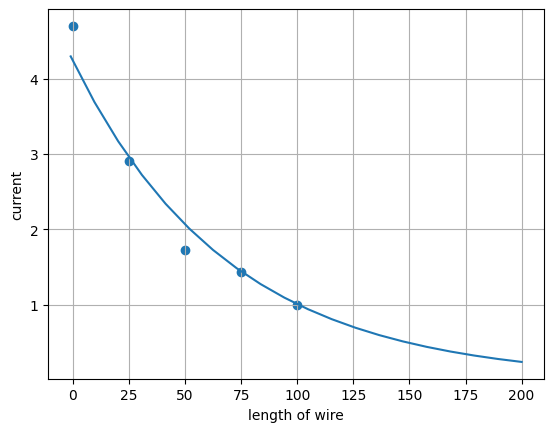

In [274]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


ls = np.linspace(-1, 200, 20)
pred_y = np.exp(m.predict(ls.reshape(-1, 1)))
ms_y = np.exp(m.predict(x.reshape(-1, 1)))
print("MSE: ", mean_squared_error(ms_y, df['value 1']))
print("MAD: ", mean_absolute_error(ms_y, df['value 1']))
plt.plot(ls, pred_y)
plt.scatter(df_transformed[["feature"]], df["value 1"])
plt.xlabel("length of wire")
plt.ylabel("current")
plt.grid(True)
plt.show()

# Exercise 10.6. Modeling multiple waves

In [275]:
csvname = datapath + 'multiple_sine_waves.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

print(np.shape(x))
print(np.shape(y))

columns = [f"feature {i}" for i in range(x.shape[0])] + [f"value {x.shape[0]+i - 1}" for i in range(y.shape[0])]
data = np.concatenate((x.T, y.T), axis=1)
# Создание DataFrame
df = pd.DataFrame(data=data, columns=columns)
df

(2, 100)
(2, 100)


,feature 0,feature 1,value 1,value 2
0,0.877061,0.960787,-0.998045,0.619299
1,0.674032,0.127804,-0.357928,0.986831
2,0.257654,0.737488,0.633718,0.800195
3,0.050499,0.562890,-0.997333,0.104796
4,0.471124,0.401974,-0.956863,0.993992
...,...,...,...,...
95,0.660111,0.940697,-0.625964,-0.633527
96,0.487139,0.014263,0.947377,-0.260383
97,0.495558,0.584829,0.303047,0.352522
98,0.239497,0.436045,-0.962934,0.502487


In [276]:
df[["feature 0", "feature 1"]]

,feature 0,feature 1
0,0.877061,0.960787
1,0.674032,0.127804
2,0.257654,0.737488
3,0.050499,0.562890
4,0.471124,0.401974
...,...,...
95,0.660111,0.940697
96,0.487139,0.014263
97,0.495558,0.584829
98,0.239497,0.436045


In [288]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
import numpy as np





svr = SVR(kernel='rbf', C=10.0, epsilon=0.01)
mosvr = MultiOutputRegressor(svr)
mosvr.fit(df[["feature 0", "feature 1"]], df[["value 1", "value 2"]])

MultiOutputRegressor(estimator=SVR(C=10.0, epsilon=0.01))

In [289]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Предсказание модели на тестовых данных
predictions = mosvr.predict(df[["feature 0", "feature 1"]])

# Расчет MSE
mse = mean_squared_error(df[["value 1", "value 2"]], predictions)

# Расчет MAD
mad = mean_absolute_error(df[["value 1", "value 2"]], predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAD):", mad)
#метрики есть, поэтому пошли нахуй.

Mean Squared Error (MSE): 8.425292379626411e-05
Mean Absolute Error (MAD): 0.007861778811720357


# Exercise 10.7. An elliptical decision boundary

In [86]:
csvname = datapath + 'ellipse_2class_data.csv'
data = np.loadtxt(csvname,delimiter=',')

x = data[:2,:]
y = data[2:,:]

print(np.shape(x))
print(np.shape(y))

columns = [f"feature {i}" for i in range(x.shape[0])] + [f"class {x.shape[0]+i - 1}" for i in range(y.shape[0])]
data = np.concatenate((x.T, y.T), axis=1)
# Создание DataFrame
df = pd.DataFrame(data=data, columns=columns)
df

(2, 150)
(1, 150)


,feature 0,feature 1,class 1
0,-0.526390,-0.544130,-1.0
1,-0.566271,0.869233,-1.0
2,0.553623,0.481993,-1.0
3,-0.467556,0.154062,1.0
4,-0.401168,-0.443116,1.0
...,...,...,...
145,0.554991,-0.749916,-1.0
146,0.670558,0.505321,-1.0
147,0.920678,0.877403,-1.0
148,0.433586,0.483979,-1.0


In [87]:
df[df["class 1"] == -1.0].count()

feature 0    96
feature 1    96
class 1      96
dtype: int64

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


params = {"class_weight" : ["balanced", None], "C": [0.0001, 0.01, 0.1, 1, 10, 100]}
model = GridSearchCV(SVC(tol=1e-6), params, cv=5, scoring="f1", refit=True)
model.fit(df[["feature 0", "feature 1"]], df["class 1"])
best = model.best_estimator_

In [100]:
from sklearn.metrics import f1_score, accuracy_score


print(model.best_params_)
y_pred = best.predict(df[["feature 0", "feature 1"]])
print(f1_score(y_pred, df["class 1"]))
print(accuracy_score(y_pred, df["class 1"]))

{'C': 100, 'class_weight': None}
0.9814814814814815
0.9866666666666667


C:\Users\Alex\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


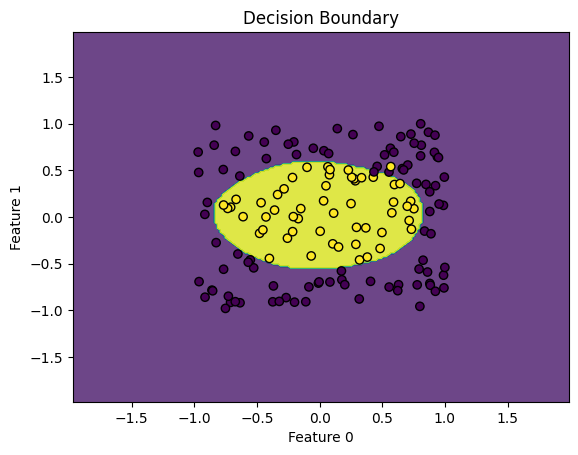

In [101]:
plt.figure()
h = .02
x_min, x_max = df["feature 0"].min() - 1, df["feature 0"].max() + 1
y_min, y_max = df["feature 1"].min() - 1, df["feature 1"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df["feature 0"], df["feature 1"], c=df["class 1"], edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

# Exercise 10.8. Engineering features for a two-class classification dataset

In [2]:
csvname = datapath + 'diagonal_stripes.csv'
data = np.loadtxt(csvname, delimiter=',')

x = data[:2,:]
y = data[2:,:]

print(np.shape(x))
print(np.shape(y))




(2, 300)
(1, 300)


In [3]:
columns = [f"feature {i}" for i in range(x.shape[0])] + [f"class {x.shape[0]+i - 1}" for i in range(y.shape[0])]
data = np.concatenate((x.T, y.T), axis=1)
# Создание DataFrame
df = pd.DataFrame(data=data, columns=columns)
df["sqr feature 0"] = df["feature 0"]**2
df["sqr feature 1"] = df["feature 1"]**2
df["sin feature 0"] = np.sin(df["feature 0"])
df["sin feature 1"] = np.sin(df["feature 1"])
df["sp feature"] = df["feature 0"]*df["feature 1"]
df["cos feature 0"] = np.cos(df["feature 0"])
df["cos feature 1"] = np.cos(df["feature 1"])

In [80]:
df = df.drop(["sin feature 1", "sin feature 0"], axis=1)

In [4]:
df

,feature 0,feature 1,class 1,sqr feature 0,sqr feature 1,sin feature 0,sin feature 1,sp feature,cos feature 0,cos feature 1
0,-1.662376,1.874437,-1.0,2.763495,3.513513,-0.995809,0.954254,-3.116019,-0.091452,-0.298996
1,-0.364374,0.147916,1.0,0.132769,0.021879,-0.356365,0.147378,-0.053897,0.934347,0.989080
2,-1.403263,1.617137,1.0,1.969148,2.615132,-0.985999,0.998926,-2.269269,0.166751,-0.046324
3,1.371107,-1.607028,-1.0,1.879935,2.582540,0.980128,-0.999344,-2.203408,0.198365,-0.036224
4,1.419840,-1.238995,1.0,2.015944,1.535108,0.988628,-0.945457,-1.759174,0.150384,0.325747
...,...,...,...,...,...,...,...,...,...,...
295,0.858125,1.744036,1.0,0.736379,3.041662,0.756618,0.985031,1.496602,0.653857,-0.172374
296,-0.879424,-0.824315,1.0,0.773386,0.679494,-0.770372,-0.734082,0.724922,0.637595,0.679060
297,1.181498,-0.876125,1.0,1.395937,0.767596,0.925176,-0.768264,-1.035140,0.379539,0.640133
298,1.848721,-1.138837,1.0,3.417770,1.296950,0.961627,-0.908147,-2.105392,-0.274361,0.418651


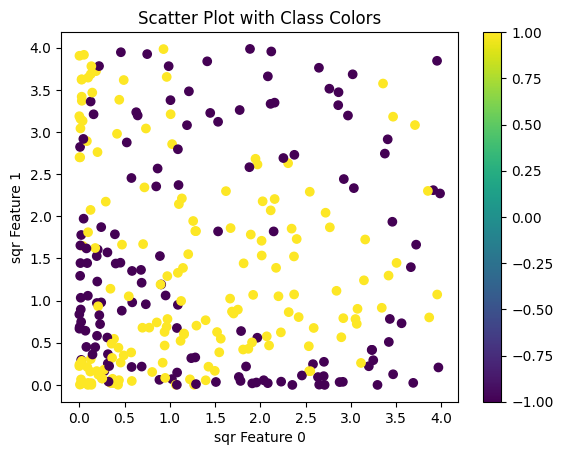

In [6]:
import matplotlib.pyplot as plt


plt.figure()
plt.scatter(df["sqr feature 0"], df["sqr feature 1"], c=df["class 1"], cmap='viridis')
plt.colorbar()  # Добавление цветовой шкалы
plt.xlabel('sqr Feature 0')
plt.ylabel('sqr Feature 1')
plt.title('Scatter Plot with Class Colors')
plt.show()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt




X_train, X_test, y_train, y_test = train_test_split(df[["feature 0", "feature 1", "sqr feature 0", "sqr feature 1", "sin feature 0", "sin feature 1"]], df["class 1"], test_size=0.2, random_state=41)
pipeline = make_pipeline(StandardScaler(), SVC(kernel="rbf", tol=1e-10))

params = {"svc__decision_function_shape": ["ovo", "ovr"], "svc__class_weight" : ["balanced", None], "svc__C": [0.0001, 0.01, 0.1, 1, 10, 100], "svc__degree": [2, 4, 6]}
model = GridSearchCV(pipeline, params, cv=3, scoring="accuracy", refit=True)
model.fit(df[["feature 0", "feature 1", "sqr feature 0", "sqr feature 1", "sin feature 0", "sin feature 1"]], df["class 1"])
best = model.best_estimator_
print(model.best_params_)

{'svc__C': 10, 'svc__class_weight': None, 'svc__decision_function_shape': 'ovo', 'svc__degree': 2}


0.9833333333333333


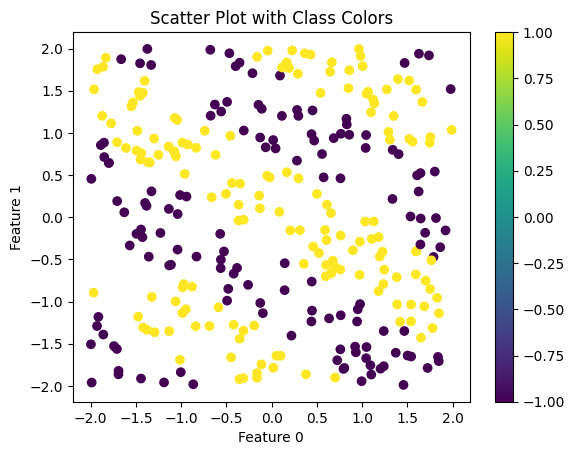

In [100]:
y_pred = best.predict(X_test)
print(accuracy_score(y_pred, y_test))

plt.figure()
plt.scatter(df["feature 0"], df["feature 1"], c=df["class 1"], cmap='viridis')
plt.colorbar()  # Добавление цветовой шкалы
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot with Class Colors')
plt.show()

#Это максимум дальше никак((

In [103]:
X_train

,feature 0,feature 1,sqr feature 0,sqr feature 1,sin feature 0,sin feature 1
29,-0.347799,0.397910,0.120964,0.158332,-0.340829,0.387492
228,0.166868,1.835870,0.027845,3.370418,0.166095,0.965073
108,-1.549999,1.315633,2.402495,1.730891,-0.999784,0.967622
231,-0.113318,-1.744371,0.012841,3.042830,-0.113076,-0.984974
133,0.943980,-1.236340,0.891098,1.528537,0.809899,-0.944589
...,...,...,...,...,...,...
236,0.830073,1.100976,0.689021,1.212148,0.737981,0.891650
282,0.280765,1.272515,0.078829,1.619295,0.277091,0.955843
89,1.290944,1.011838,1.666537,1.023816,0.961096,0.847808
243,-0.925351,0.861084,0.856275,0.741465,-0.798832,0.758549


In [105]:
from catboost import CatBoostClassifier



model = CatBoostClassifier(task_type="GPU")
model.fit(X_train[["feature 0", "feature 1"]], y_train, silent=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [107]:
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9


# Exercise 10.9. A circular manifold

In [7]:
path = '../mlrefined_datasets/unsuperlearn_datasets/'
X = np.loadtxt(path + 'circle_data.csv',delimiter=',')

print(np.shape(X))

df = pd.DataFrame(data=X.T, columns=["feature 1", "feature 2"])
df

(2, 20)


,feature 1,feature 2
0,0.858112,1.500000
1,0.809432,2.510316
2,0.187157,3.307026
3,-0.678376,3.731973
4,-1.329631,4.486490
5,-2.300000,4.208788
6,-3.087276,3.922987
7,-3.884079,3.680298
8,-4.612792,3.180342
9,-5.071675,2.400572


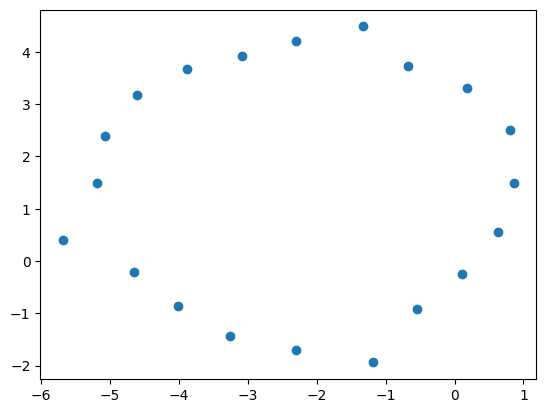

In [8]:
plt.scatter(df[["feature 1"]], df[["feature 2"]])
plt.show()

In [9]:
df.values[:, 0]

array([ 0.85811215,  0.8094324 ,  0.18715728, -0.67837634, -1.32963074,
       -2.3       , -3.08727619, -3.88407948, -4.6127922 , -5.07167453,
       -5.18424474, -5.68405735, -4.65714766, -4.01609845, -3.2551362 ,
       -2.3       , -1.18248122, -0.54598303,  0.10822159,  0.62383492])

In [32]:
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def circle(w, x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    encode = jnp.arctan((x2 - w[1]) / (x1 - w[0]))
    xd1 = w[2]*jnp.cos(encode) + w[0]
    xd2 = w[2]*jnp.sin(encode) + w[1]
    xd = jnp.column_stack((xd1, xd2))
    return xd

def circle1(w, x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    par = ((x2 - w[1])**2) + ((x1 - w[0])**2)
    return par


def MSE(x, w):
    x1 = x[:, 0]
    x2 = x[:, 1]
    encode = jnp.arctan((x2 - w[1]) / (x1 - w[0]))
    xd1 = w[2]*jnp.cos(encode) + w[0]
    xd2 = w[2]*jnp.sin(encode) + w[1]
    xd = jnp.column_stack((xd1, xd2))
    return jnp.mean((abs(xd - x)))

def MSE1(x, w):
    x1 = x[:, 0]
    x2 = x[:, 1]
    par = ((x2 - w[1])**2) + ((x1 - w[0])**2)
    return jnp.mean((jnp.sqrt(par) - w[2])**2)

def Adam(func, beta1, beta2, x, epsilon=1e-8, learning_rate=0.1, max_iters=500):
    mse_grad_W = grad(func, argnums=1)
    
    m_W, v_W = 0, 0
    W = np.random.uniform(-1, 1, 3)

    for _ in range(max_iters):
        grad_W = mse_grad_W(x, W)
        

        m_W = beta1 * m_W + (1 - beta1) * grad_W
        v_W = beta2 * v_W + (1 - beta2) * grad_W**2
        

        m_W_corr = m_W / (1 - beta1)
        v_W_corr = v_W / (1 - beta2)

        W -= learning_rate * m_W_corr / (jnp.sqrt(v_W_corr) + epsilon)
    print(grad_W)
    return W
        


weights = Adam(MSE1, 0.8, 0.8, df.values, max_iters=1500)
print(f"w1: {weights[0]}, w2: {weights[1]}, r: {weights[2]}")

[ 0.02315088  0.00468077 -0.03954931]
w1: -2.240386486053467, w2: 1.3013240098953247, r: 3.0166704654693604


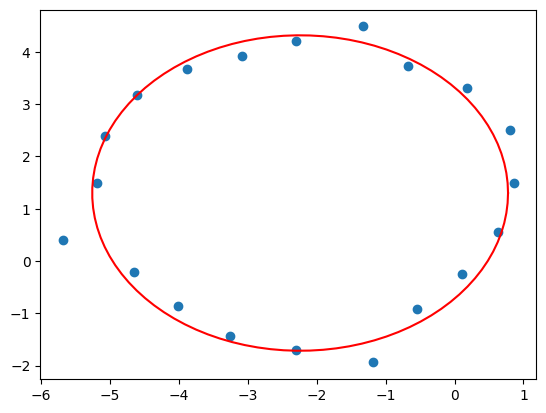

In [38]:
def generate_circle_points(center, radius, num_points=100):
    points = []
    for theta in np.linspace(0, 2*np.pi, num_points):
        x = center[0] + radius * np.cos(theta)
        y = center[1] + radius * np.sin(theta)
        points.append([x, y])
    return np.array(points)


coord = generate_circle_points(weights[0:2], weights[2])
plt.plot(coord[:, 0], coord[:, 1], c="r")
plt.scatter(df[["feature 1"]], df[["feature 2"]])
plt.show()

[[ 0.77010155  1.4943568 ]
 [ 0.5639758   2.4130135 ]
 [ 0.08519149  3.2227788 ]
 [-0.6095054   3.8391438 ]
 [-1.411047    4.2017546 ]
 [-2.302226    4.317361  ]
 [-3.1676948   4.1719337 ]
 [-3.955185    3.7832117 ]
 [-4.6051755   3.1743093 ]
 [-5.052544    2.3931441 ]
 [-5.250211    1.5044518 ]
 [-5.158846    0.53784966]
 [-4.7968926  -0.3001057 ]
 [-4.154343   -1.0304288 ]
 [-3.2877474  -1.5276929 ]
 [-2.3003776  -1.7147499 ]
 [-1.3042307  -1.5664126 ]
 [-0.4077859  -1.0948972 ]
 [ 0.27690244 -0.36107087]
 [ 0.6775613   0.53589505]]


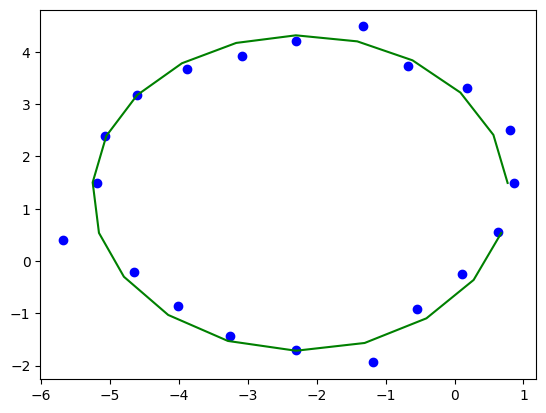

In [37]:
x = df.values
def decode_points(x, weights):
    x1 = x[:, 0]
    x2 = x[:, 1]
    encode = jnp.arctan2(x2 - weights[1], x1 - weights[0])  # Используем arctan2 для учета знаков
    xd1 = weights[2] * jnp.cos(encode) + weights[0]
    xd2 = weights[2] * jnp.sin(encode) + weights[1]
    decoded_points = jnp.column_stack((xd1, xd2))
    return decoded_points

# Пример использования
decoded_data = decode_points(df.values, weights)
print(decoded_data)
plt.scatter(df[["feature 1"]], df[["feature 2"]], c="b")
plt.plot(decoded_data[:, 0], decoded_data[:, 1], c="g")
plt.show()

In [39]:
from sklearn.decomposition import KernelPCA

# Я работяга, а не учёный :)

kpca = KernelPCA(kernel='poly', n_components=2, fit_inverse_transform=True, degree=2)


x_transformed = kpca.fit_transform(df.values)

x_reconstructed = kpca.inverse_transform(x_transformed)
x_reconstructed

array([[ 0.04739569,  0.54756016],
       [ 0.44614888,  1.3043911 ],
       [ 0.69308509,  2.59021657],
       [ 0.23350868,  3.59262833],
       [-1.32843184,  4.99741498],
       [-2.3729539 ,  4.44116251],
       [-3.17757858,  3.83662532],
       [-4.23678151,  3.41263171],
       [-4.72586736,  2.96168458],
       [-4.58718155,  2.41689268],
       [-4.47977505,  1.53083068],
       [-6.47283218,  0.96531286],
       [-4.55401643, -0.84211807],
       [-3.85544273, -1.60656748],
       [-2.88689826, -1.7661077 ],
       [-1.65564282, -1.21692916],
       [-0.62813571, -0.34648847],
       [-0.40096011, -0.06445926],
       [-0.24368064,  0.13590061],
       [-0.15666667,  0.25130839]])

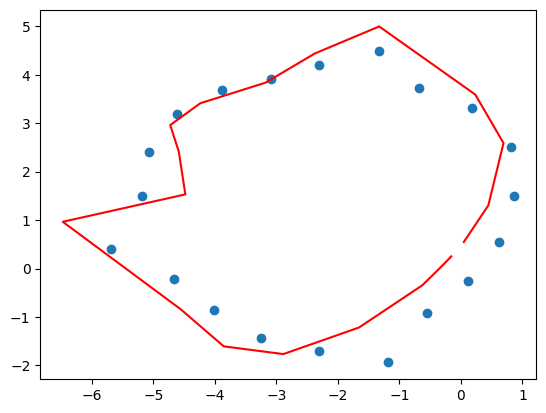

In [41]:
plt.scatter(df[["feature 1"]], df[["feature 2"]])
plt.plot(x_reconstructed[:, 0], x_reconstructed[:, 1], c="r")
plt.show()

In [85]:
components = kpca.eigenvalues_
center = kpca.eigenvectors_
print(components, center)

[768.0081018  489.13025812] [[-0.22689635 -0.0135767 ]
 [-0.22644023  0.04555584]
 [-0.19622019  0.14738002]
 [-0.12892066  0.23769829]
 [-0.04087065  0.37360859]
 [ 0.06519206  0.35583845]
 [ 0.16092716  0.31116732]
 [ 0.27218813  0.25563859]
 [ 0.36181172  0.13782571]
 [ 0.38102954 -0.02527582]
 [ 0.32550144 -0.17432257]
 [ 0.3186183  -0.37336096]
 [ 0.11318974 -0.32183669]
 [-0.00643133 -0.30214308]
 [-0.10790578 -0.25123415]
 [-0.17946983 -0.16945082]
 [-0.22173357 -0.08630298]
 [-0.21906828 -0.06319854]
 [-0.22127939 -0.04670819]
 [-0.22322182 -0.0373023 ]]


# Extra: Elliptical boundaries

In [45]:
csvname = datapath + '3_layercake_data.csv'
data = np.loadtxt(csvname, delimiter=',')

x = data[:2,:]
y = data[2:,:]

print(np.shape(x))
print(np.shape(y))

df = pd.DataFrame(data=np.concatenate((x.T, y.T), axis=1), columns=['feature 1', "feature 2", 'class'])
df

(2, 110)
(1, 110)


,feature 1,feature 2,class
0,0.434332,0.668129,2.0
1,0.388249,0.595029,2.0
2,0.461982,0.422515,2.0
3,0.526498,0.577485,2.0
4,0.438940,0.597953,2.0
...,...,...,...
105,0.077189,0.165205,0.0
106,0.508065,0.021930,0.0
107,0.770737,0.644737,0.0
108,0.699309,0.779240,0.0


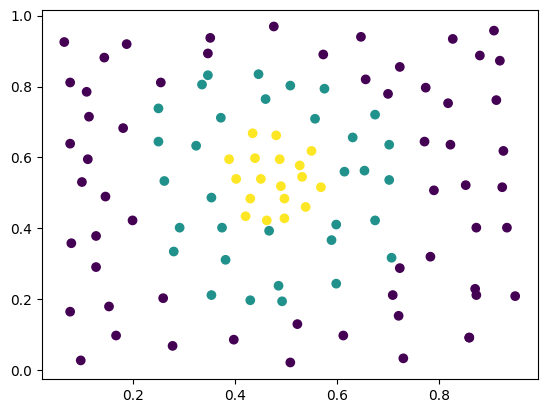

In [59]:
plt.scatter(df["feature 1"], df["feature 2"], c=df["class"])
plt.show()

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(df[["feature 1", "feature 2"]], df["class"], test_size=0.1) 
pipeline = make_pipeline(StandardScaler(), SVC(tol=1e-6))
params = {"svc__kernel": ["poly", "rbf"], "svc__coef0": np.arange(0, 2, 11), "svc__degree": [2, 4], "svc__class_weight": [None, "balanced"]}
selector = GridSearchCV(pipeline, params, cv=3, scoring="accuracy", refit=True, n_jobs=4)
selector.fit(X_train, y_train)
best_model = selector.best_estimator_
print("The best approach: ", selector.best_params_)

The best approach:  {'svc__class_weight': None, 'svc__coef0': 0, 'svc__degree': 2, 'svc__kernel': 'rbf'}


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix


y_pred = best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n\n", confusion_matrix(y_pred, y_test))

Accuracy:  1.0
Confusion Matrix: 

 [[6 0 0]
 [0 2 0]
 [0 0 3]]


C:\Users\Alex\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


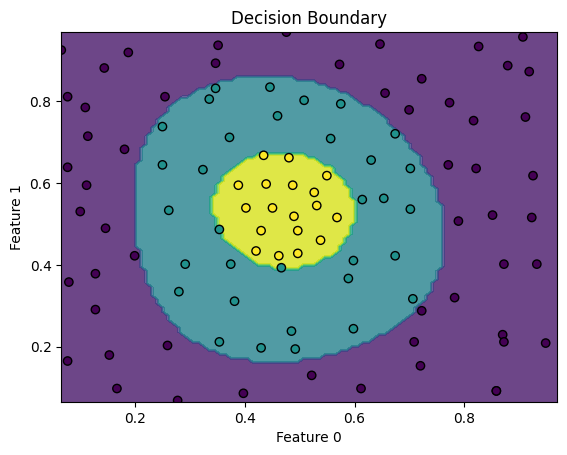

In [87]:
plt.figure()
h = .01
x_min, x_max = df["feature 1"].min() - 1, df["feature 2"].max() + 1
y_min, y_max = df["feature 1"].min() - 1, df["feature 2"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df["feature 1"], df["feature 2"], c=df["class"], edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.xlim(x_min + 1, x_max- 1)
plt.ylim(y_min + 1, y_max - 1)
plt.show()

# Extra: Determining the orbit of celestial bodies

In [89]:
csvname = datapath + 'asteroid_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

print(np.shape(x))
print(np.shape(y))

df = pd.DataFrame(data=np.concatenate((x, y), axis=1), columns=['feature', 'value'])
df

(20, 1)
(20, 1)


,feature,value
0,-4.45270,-0.467520
1,-5.46310,-0.331160
2,-4.92270,0.536550
3,1.60150,1.019700
4,-0.31362,1.022400
5,-4.89180,-0.483410
6,-4.97640,0.544690
7,4.54260,0.547150
8,-5.08720,0.358870
9,-2.05290,0.993280


In [197]:
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



def MSE1(x, w):
    x1 = x[:, 0]
    x2 = x[:, 1]
    par = w[2]*((x2 - w[0])**2) + w[3]*((x1 - w[1])**2)
    return jnp.mean((par - 1.0)**2) + jnp.abs((w[2] - abs(w[2])) + (w[3] - abs(w[3]))) #positive_booster

def Adam(func, beta1, beta2, x, epsilon=1e-8, learning_rate=0.1, max_iters=500):
    mse_grad_W = grad(func, argnums=1)
    
    m_W, v_W = 0, 0
    W = np.random.uniform(0.1, 5, 4)

    for _ in range(max_iters):
        grad_W = mse_grad_W(x, W)
        

        m_W = beta1 * m_W + (1 - beta1) * grad_W
        v_W = beta2 * v_W + (1 - beta2) * grad_W**2
        

        m_W_corr = m_W / (1 - beta1)
        v_W_corr = v_W / (1 - beta2)

        W -= learning_rate * m_W_corr / (jnp.sqrt(v_W_corr) + epsilon)
    print(grad_W)
    return W
        


weights = Adam(MSE1, 0.9, 0.999, df.values, max_iters=1000, learning_rate=0.4)
print(f"w1: {weights[0]}, w2: {weights[1]}, a: {weights[2]}, b: {weights[3]}")

[ 0.00014912 -0.02274106 -0.00171766  0.00106841]
w1: 0.08701125532388687, w2: -0.34215912222862244, a: 1.033831238746643, b: 0.033948056399822235


In [198]:
MSE1(df.values, weights) #nice

Array(0.00649592, dtype=float32)

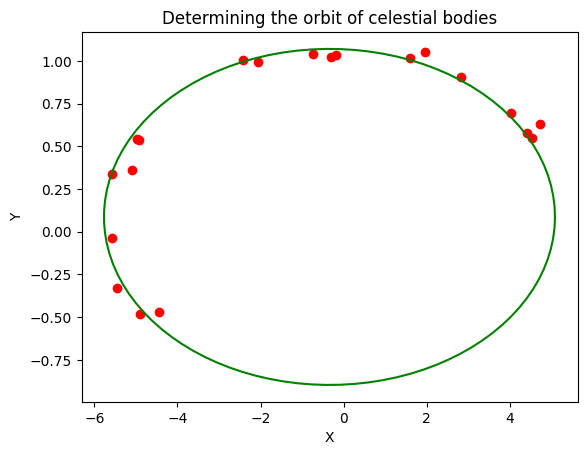

In [199]:
def orbit(center, a, b, num_points=100):
    points = []
    for theta in np.linspace(0, 2*np.pi, num_points):
        x = center[1] + 1 / np.sqrt(a) * np.cos(theta)
        y = center[0] + 1 / np.sqrt(b) * np.sin(theta)
        points.append([x, y])
    return np.array(points)


points = orbit(weights[0:2], a=weights[3], b=weights[2])


plt.scatter(df["feature"], df['value'], c="r")
plt.plot(points[:, 0], points[:, 1], c="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Determining the orbit of celestial bodies")
plt.show()

## Идеально! Несколько инициализаций + оптимальные параметры на оптимизаторе)